In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from pathlib import Path
import lightgbm as lgb
import xgboost as xgb
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
import optuna
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
input_filepath = '/kaggle/input'

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        filepath = os.path.join(dirname, filename)
        if 'test' in filepath:
            test_df = pd.read_csv (filepath)
        elif 'train' in filepath:
            train_df = pd.read_csv (filepath)
        else:
            sample_df = pd.read_csv (filepath)
display(train_df)
display(test_df)
display(sample_df)

,id,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
0,0,525.0,0.0,0.0,186.0,0.0,1125.0,613.0,3,10.38
1,1,143.0,169.0,143.0,191.0,8.0,967.0,643.0,28,23.52
2,2,289.0,134.7,0.0,185.7,0.0,1075.0,795.3,28,36.96
3,3,304.0,76.0,0.0,228.0,0.0,932.0,670.0,365,39.05
4,4,157.0,236.0,0.0,192.0,0.0,935.4,781.2,90,74.19
...,...,...,...,...,...,...,...,...,...,...
5402,5402,446.0,24.0,79.0,162.0,11.6,967.0,712.0,3,15.42
5403,5403,350.0,0.0,0.0,203.0,0.0,974.0,775.0,180,49.20
5404,5404,295.8,0.0,0.0,185.7,0.0,1076.2,759.3,28,39.30
5405,5405,376.0,93.4,0.0,162.6,11.5,955.8,662.9,28,39.61


,id,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays
0,5407,166.1,75.4,163.8,173.8,4.6,1007.2,746.6,56
1,5408,304.0,0.0,0.0,190.0,0.0,998.0,801.0,7
2,5409,225.0,0.0,0.0,185.0,0.0,1113.0,833.0,28
3,5410,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,100
4,5411,144.0,15.0,195.0,176.0,6.0,1021.0,709.0,28
...,...,...,...,...,...,...,...,...,...
3600,9007,140.0,129.0,100.0,200.0,7.0,864.0,753.0,28
3601,9008,281.0,0.0,0.0,186.0,0.0,1104.0,774.0,28
3602,9009,289.0,133.0,0.0,194.0,7.0,924.0,760.0,28
3603,9010,469.0,117.2,0.0,137.8,32.2,852.1,840.5,3


,id,Strength
0,5407,35.452
1,5408,35.452
2,5409,35.452
3,5410,35.452
4,5411,35.452
...,...,...
3600,9007,35.452
3601,9008,35.452
3602,9009,35.452
3603,9010,35.452


In [3]:
target = 'Strength'

# EDA

# Categorical features - correlation with target

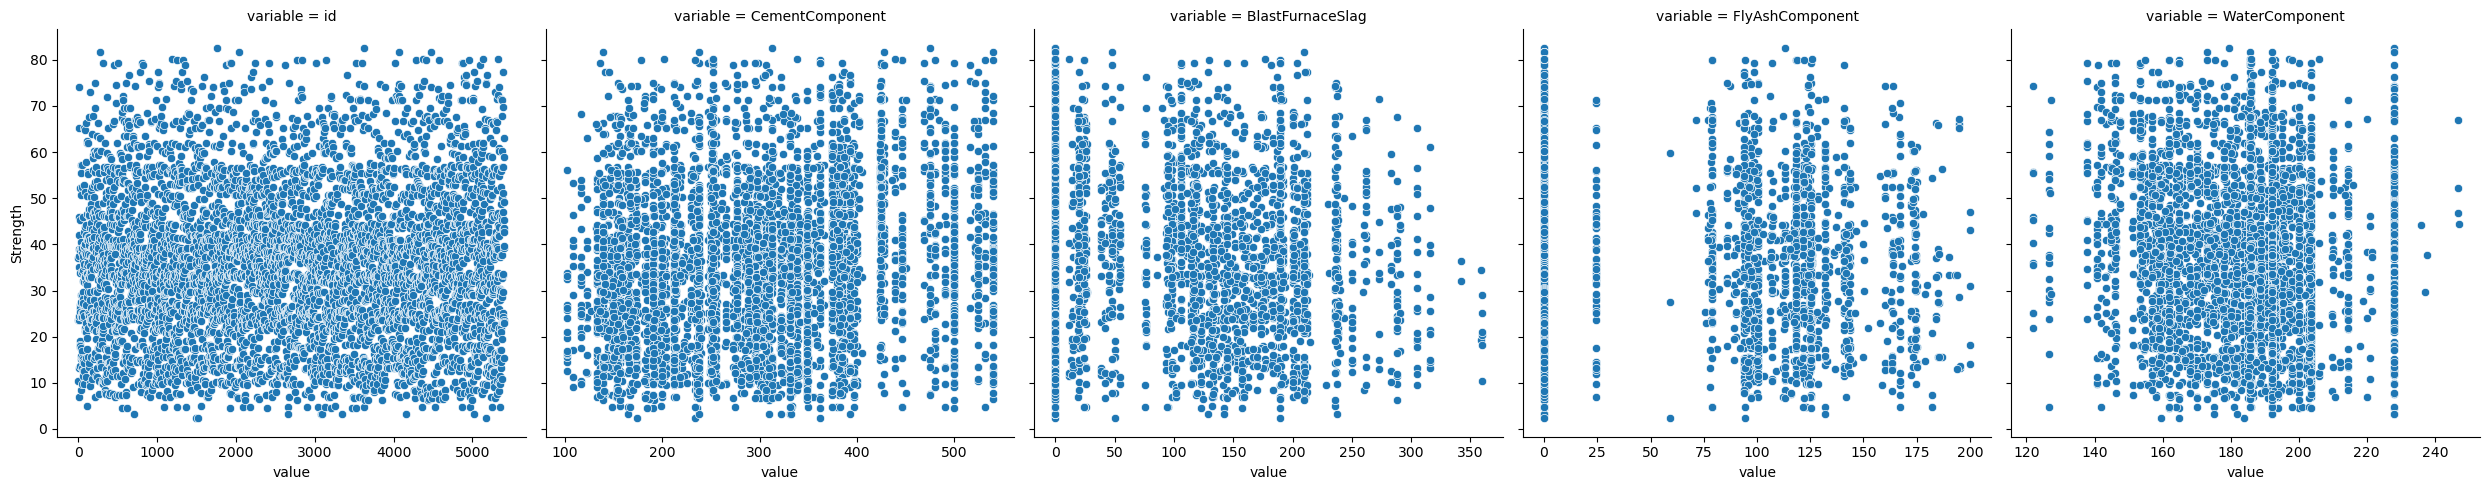

In [4]:
features = train_df.columns[0:5]
sns.relplot(
    x="value", y=target, col="variable", data=train_df.melt(id_vars=target, value_vars=features), facet_kws=dict(sharex=False),
);

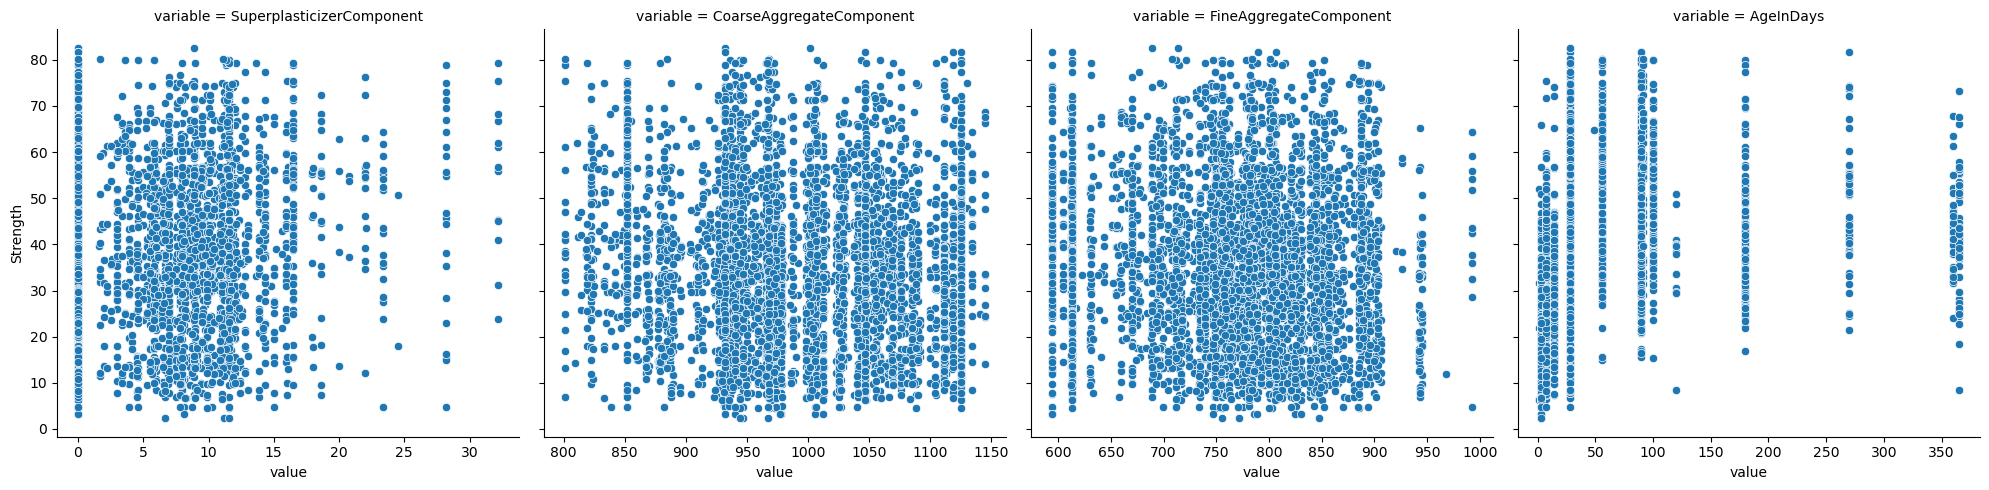

In [5]:
features = train_df.columns[5:9]
sns.relplot(
    x="value", y=target, col="variable", data=train_df.melt(id_vars=target, value_vars=features), facet_kws=dict(sharex=False),
);

In [6]:
#feature = "carat"

#sns.lmplot(
#    x=feature, y="price", hue="cut", col="cut",
#    data=train_df, scatter_kws={"edgecolor": 'w'}, col_wrap=3, height=4,
#);

### Features with relevance
* no category features


## Features correlation

<AxesSubplot:>

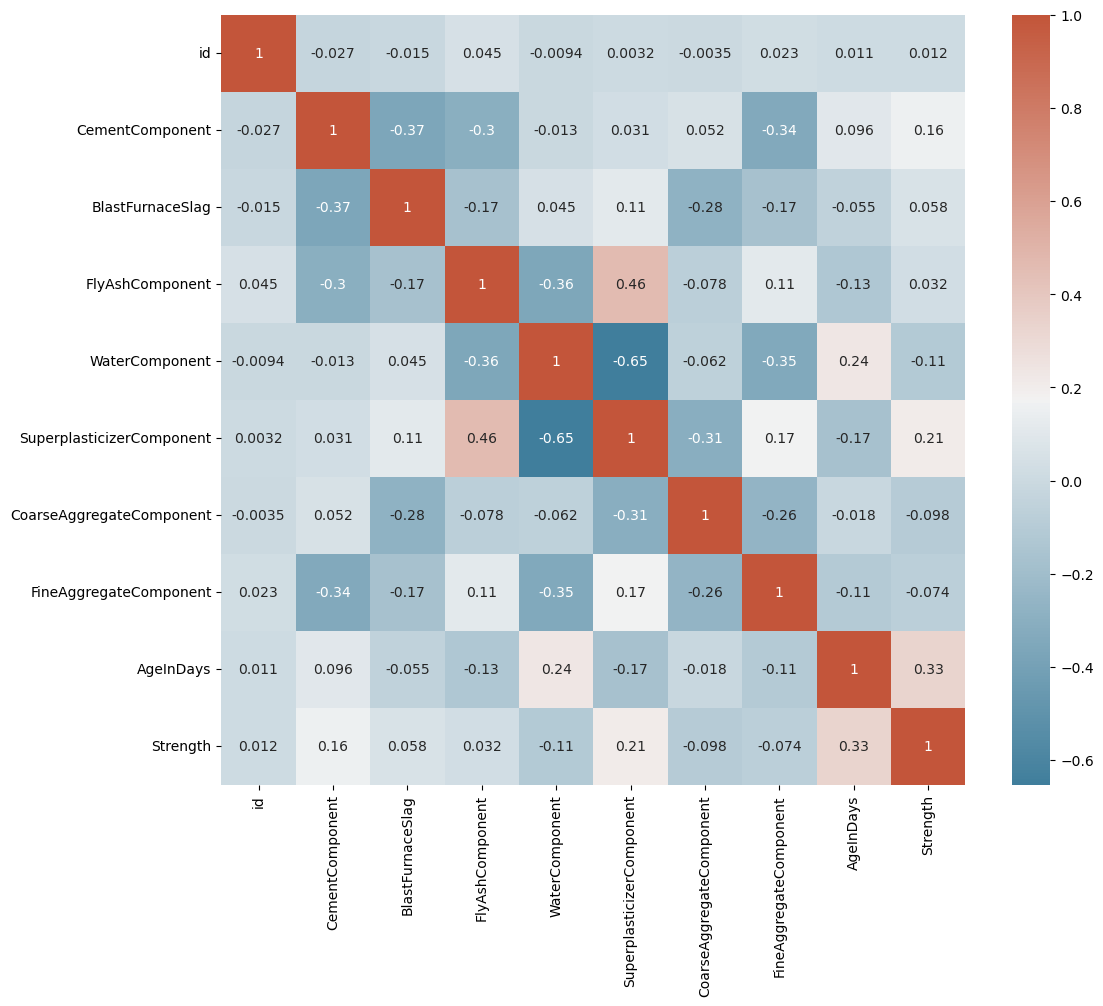

In [7]:
# Correlation between different variables
corr = train_df.corr()
#
# Set up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(12, 10))

# Generate a mask for upper traingle
#mask = np.triu(np.ones_like(corr, dtype=bool))

# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, annot=True, cmap=cmap)

Features with some correlation can be discarded. We wil see how they score with 'feature_importance'.
Features that can be discarded: 
* SuperplasticizerComponent
* AgeInDays

In [8]:
#OUTPUT_PATH = Path.cwd().parent.resolve() / 'working'
#MODEL_DIR = OUTPUT_PATH / "model"
#MODEL_DIR.mkdir(exist_ok=True, parents=True)
#features_path= MODEL_DIR / "x_train.csv"
#labels_path=MODEL_DIR / "y_train.csv"
#test_path= MODEL_DIR / "x_test.csv"
#preds_save_path=MODEL_DIR / "y_preds.npy",

X = train_df.drop (columns = ['id', target])
y = train_df[target]
X_test = test_df.drop (columns = ['id'])

In [9]:
# Utility functions from Tutorial
def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

#mi_scores = make_mi_scores(X[['cut', 'color', 'clarity']], y)
#mi_scores

# Adding features

In [10]:
# Counting used components in column 'Components' as there are several with 0 quantity (= not used)
components = X.columns[:7]
X["Components"] = X[components].gt(0).sum(axis=1)
X_test["Components"] = X_test[components].gt(0).sum(axis=1)

# Optional: Ensemble models (for non-categorical data)

In [11]:
best_parameters = []
model_regressors = {'LGBM': lgb, 'GB': GradientBoostingRegressor, 'RF': RandomForestRegressor}
objective = 'regression'
boosting_type = 'gbdt'
metric = 'rmse'
scoring = 'neg_root_mean_squared_error'
direction = 'minimize'

x_train, x_val, y_train, y_val = train_test_split (X, y, test_size = 0.1, random_state=42)
train_data = lgb.Dataset(x_train, label = y_train)

# Stage 1: models

In [12]:
class RegressionModel(object):
    def __init__(self, clf, params=None):
        self.clf = clf(**params)
        
    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)
    
    def fit(self,x,y):
        return self.clf.fit(x,y)
    
    def feature_importances(self,x,y):
        return self.clf.fit(x,y).feature_importances_
    
    def predict(self, x):
        return self.clf.predict(x)
    
def trainModel(model, x_train, y_train, n_folds, seed):
    cv = KFold(n_splits = n_folds, shuffle = True, random_state = seed)
    scores = cross_val_score(model.clf, x_train, y_train, scoring = scoring, cv = cv, n_jobs = -1)
    model.train (x_train, y_train)
    return scores, model

def categorize_features (X: pd.DataFrame):
    obj_feat = list(X.loc[:, X.dtypes == 'object'].columns.values)
    for feature in obj_feat:
        X[feature] = pd.Series(X[feature], dtype="category")
    return X
    
def objective_lgbm(trial):
    param = {
        'boosting_type': trial.suggest_categorical('boosting_type', [boosting_type]),
        'objective': trial.suggest_categorical('objective', [objective]),
        'metric': trial.suggest_categorical('metric', [metric]),
        "bagging_freq": trial.suggest_int('bagging_freq', 1,10), 
        "bagging_fraction": trial.suggest_float('bagging_fraction',0.1,1),
        'num_leaves': trial.suggest_int('num_leaves', 10,100),
        'max_depth': trial.suggest_int('max_depth', 10,100),
        'min_split_gain': trial.suggest_float('min_split_gain',0.1,1),
        'colsample_bytree': trial.suggest_float('colsample_bytree',0.1,1),
        'reg_alpha' : trial.suggest_float('reg_alpha',0.1,10),
        'reg_lambda': trial.suggest_float('reg_lambda',0.1,10),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01,0.1),
        'verbosity': trial.suggest_int('verbosity', -1, -1)
    }
    num_boost_rounds = trial.suggest_int('num_boost_rounds', 50,400)
    model = lgb.train(param, train_data, num_boost_rounds)
    preds = model.predict(x_val)
    pred_labels = np.rint(preds)
    score = round(np.sqrt(mean_squared_error(y_val, pred_labels)),4)
    return score

def objective_rf(trial):
    rf_params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 1, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
        'max_features' : trial.suggest_categorical('max_features', ['sqrt', 'log2']),
        }
    rfc_model = RegressionModel(clf = RandomForestRegressor, params = rf_params)
    rfc_scores, _ = trainModel(rfc_model, x_train, y_train, 5, 42)
    score = round(-rfc_scores.mean(), 4)
    return score

def objective_gb(trial):
    gb_params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
        }
    gb_model = RegressionModel(clf = GradientBoostingRegressor, params = gb_params)
    gb_scores, _ = trainModel(gb_model, x_train, y_train, 5, 42)
    score = round(-gb_scores.mean(), 4)
    return score

def objective_xgb(trial):
    xgb_params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'min_child_weight': trial.suggest_int('max_depth', 1, 10),
        'gamma': trial.suggest_float('gamma', 0.001, 1),                        
        'subsample': trial.suggest_float('subsample', 0.01, 1),
        'colsample_bytree': trial.suggest_float('subsample', 0.01, 1)
    }
    xgb_model = RegressionModel(clf = xgb.XGBRegressor, params = xgb_params)
    xgb_scores, _ = trainModel(xgb_model, x_train, y_train, 5, 42)
    score = round(-xgb_scores.mean(), 4)
    return score


In [13]:
model_functions = {'LGBM': objective_lgbm, 'RF': objective_rf, 'GB': objective_gb}

# get best hyperparameters

print(f"Training features of shape {X.shape}")
display (x_train)
print(f"Training labels of shape {y.shape}")
display (y_train)
print(f"Test features of shape {X_test.shape}")
display (x_val)
print ('---------------------------------------')
print ('-- Getting Best Parameters and Score---')
print ('---------------------------------------')

print ('')
for key, function in model_functions.items():
    study = optuna.create_study(direction = direction,study_name = key)
    study.optimize(function, n_trials = 100)

    trial = study.best_trial
    print(key, "model RMSE --> ",trial.value)
    print(key, "model's Best parameters --> ",trial.params)
    best_parameters.append (dict(name = key, params = trial.params, score = trial.value)) 

Training features of shape (5407, 9)


,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Components
4245,145.4,114.6,89.3,237.8,6.1,869.1,656.9,28,7
1335,446.0,24.0,79.0,162.0,11.6,967.0,712.0,7,7
5288,382.5,0.0,0.0,185.7,0.0,1047.8,739.3,7,4
1476,190.3,0.0,125.4,166.6,7.6,1090.0,798.9,14,6
553,266.1,98.1,87.1,191.8,6.1,824.1,657.0,56,7
...,...,...,...,...,...,...,...,...,...
3772,350.0,0.0,0.0,186.0,0.0,974.0,775.0,56,4
5191,250.2,166.8,0.0,185.7,0.0,1111.6,784.3,28,5
5226,540.0,0.0,0.0,173.2,0.0,1125.0,613.2,7,4
5390,500.0,153.0,0.0,200.0,0.0,1125.0,613.0,180,5


Training labels of shape (5407,)


4245    37.68
1335    46.23
5288    22.50
1476    17.58
553     58.61
        ...  
3772    55.20
5191    39.36
5226    11.96
5390    69.84
860     55.90
Name: Strength, Length: 4866, dtype: float64

Test features of shape (3605, 9)


,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Components
4269,255.0,0.0,0.0,192.0,0.0,889.8,845.0,3,4
1615,397.0,0.0,0.0,192.0,0.0,940.6,785.6,7,4
1924,212.5,0.0,121.6,172.3,8.7,1043.6,759.3,100,6
230,339.0,0.0,158.0,196.0,10.6,949.0,784.0,28,6
465,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90,4
...,...,...,...,...,...,...,...,...,...
4149,275.0,0.0,0.0,183.0,0.0,1088.0,808.0,90,4
3353,273.0,116.0,90.0,199.0,9.0,904.0,768.0,28,7
3691,254.0,0.0,0.0,198.0,0.0,968.0,863.0,180,4
838,362.6,0.0,0.0,164.9,11.6,944.7,755.8,7,5


[I 2023-03-21 05:47:00,445] A new study created in memory with name: LGBM


---------------------------------------
-- Getting Best Parameters and Score---
---------------------------------------



/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
[I 2023-03-21 05:47:01,507] Trial 0 finished with value: 12.0039 and parameters: {'boosting_type': 'gbdt', 'objective': 'regression', 'metric': 'rmse', 'bagging_freq': 10, 'bagging_fraction': 0.4349120624202645, 'num_leaves': 26, 'max_depth': 43, 'min_split_gain': 0.29775276026884545, 'colsample_bytree': 0.695800902560617, 'reg_alpha': 1.5863549308587066, 'reg_lambda': 2.9633968132557094, 'n_estimators': 141, 'learning_rate': 0.08660921808000094, 'verbosity': -1, 'num_boost_rounds': 115}. Best is trial 0 with value: 12.0039.
/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
[I 2023-03-21 05:47:04,574] Trial

LGBM model RMSE -->  11.7997
LGBM model's Best parameters -->  {'boosting_type': 'gbdt', 'objective': 'regression', 'metric': 'rmse', 'bagging_freq': 5, 'bagging_fraction': 0.6162792479204383, 'num_leaves': 14, 'max_depth': 13, 'min_split_gain': 0.7683794904374545, 'colsample_bytree': 0.439738846242955, 'reg_alpha': 3.524224078989064, 'reg_lambda': 1.3619380044713316, 'n_estimators': 408, 'learning_rate': 0.014642124341269769, 'verbosity': -1, 'num_boost_rounds': 127}


[I 2023-03-21 05:50:54,151] Trial 0 finished with value: 12.3822 and parameters: {'n_estimators': 427, 'max_depth': 5, 'min_samples_leaf': 11, 'max_features': 'log2'}. Best is trial 0 with value: 12.3822.
[I 2023-03-21 05:51:07,993] Trial 1 finished with value: 12.2141 and parameters: {'n_estimators': 736, 'max_depth': 19, 'min_samples_leaf': 20, 'max_features': 'log2'}. Best is trial 1 with value: 12.2141.
[I 2023-03-21 05:51:31,787] Trial 2 finished with value: 12.7143 and parameters: {'n_estimators': 828, 'max_depth': 16, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 1 with value: 12.2141.
[I 2023-03-21 05:51:39,320] Trial 3 finished with value: 12.7692 and parameters: {'n_estimators': 261, 'max_depth': 17, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 1 with value: 12.2141.
[I 2023-03-21 05:51:48,099] Trial 4 finished with value: 12.2211 and parameters: {'n_estimators': 427, 'max_depth': 14, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is tr

RF model RMSE -->  12.1961
RF model's Best parameters -->  {'n_estimators': 865, 'max_depth': 11, 'min_samples_leaf': 12, 'max_features': 'log2'}


[I 2023-03-21 06:17:11,554] Trial 0 finished with value: 12.2173 and parameters: {'n_estimators': 1000, 'learning_rate': 0.012750880809180014, 'min_samples_leaf': 20}. Best is trial 0 with value: 12.2173.
[I 2023-03-21 06:17:24,752] Trial 1 finished with value: 12.3645 and parameters: {'n_estimators': 590, 'learning_rate': 0.0587820913625319, 'min_samples_leaf': 15}. Best is trial 0 with value: 12.2173.
[I 2023-03-21 06:17:43,647] Trial 2 finished with value: 12.6135 and parameters: {'n_estimators': 853, 'learning_rate': 0.0681737623276706, 'min_samples_leaf': 4}. Best is trial 0 with value: 12.2173.
[I 2023-03-21 06:17:58,531] Trial 3 finished with value: 12.5733 and parameters: {'n_estimators': 665, 'learning_rate': 0.07619809740690729, 'min_samples_leaf': 2}. Best is trial 0 with value: 12.2173.
[I 2023-03-21 06:18:16,048] Trial 4 finished with value: 12.5295 and parameters: {'n_estimators': 787, 'learning_rate': 0.07293959261680431, 'min_samples_leaf': 12}. Best is trial 0 with val

GB model RMSE -->  12.1802
GB model's Best parameters -->  {'n_estimators': 179, 'learning_rate': 0.032804059988558475, 'min_samples_leaf': 16}


In [14]:
best_parameters_df = pd.DataFrame (best_parameters).set_index('name')
display (best_parameters_df)

,params,score
name,,
LGBM,"{'boosting_type': 'gbdt', 'objective': 'regres...",11.7997
RF,"{'n_estimators': 865, 'max_depth': 11, 'min_sa...",12.1961
GB,"{'n_estimators': 179, 'learning_rate': 0.03280...",12.1802


In [15]:
print ('-----------------------------------------')
print ('-- Train Models and Get Feature Preds ---')
print ('-----------------------------------------')

preds_list = []
X_train = []
for key, reg in model_regressors.items():
    model = None
    print ('Training ', key)
    params = best_parameters_df.loc[key, 'params']
    if key == 'LGBM':
        model = reg.train (params, train_data, params['num_boost_rounds'])
    else:
        model = RegressionModel(clf = reg, params=params)
        trainModel (model, x_train, y_train, 5, 42)
    preds = model.predict (x_train)
    print ('Predicting values')
    preds_list.append (dict(name = key, preds = preds))
    if len(X_train) == 0:
        X_train = preds
    else:
        X_train = np.column_stack ((X_train, preds))
X_train_df = pd.DataFrame (X_train, columns = model_regressors.keys())
print ('Finished training and predictions.')

-----------------------------------------
-- Train Models and Get Feature Preds ---
-----------------------------------------
Training  LGBM


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Predicting values
Training  GB
Predicting values
Training  RF
Predicting values
Finished training and predictions.


# Stage 2: Stacking Model

In [16]:
print ('-------------------------------')
print ('--- Training Stacking Model ---')
print ('-------------------------------')


study = optuna.create_study(direction = direction, study_name = 'XGB')
study.optimize(objective_xgb, n_trials = 50)

trial = study.best_trial
print("XGB model RMSE --> ",trial.value)
print("XGB model's Best parameters --> ",trial.params)
best_parameters_df.loc['XGB'] = [trial.params, trial.value]

[I 2023-03-21 06:28:19,647] A new study created in memory with name: XGB


-------------------------------
--- Training Stacking Model ---
-------------------------------


[I 2023-03-21 06:28:21,969] Trial 0 finished with value: 13.9374 and parameters: {'n_estimators': 219, 'max_depth': 3, 'gamma': 0.7946022476262938, 'subsample': 0.03559940459522375}. Best is trial 0 with value: 13.9374.
[I 2023-03-21 06:28:34,507] Trial 1 finished with value: 14.0164 and parameters: {'n_estimators': 887, 'max_depth': 4, 'gamma': 0.5576137127196896, 'subsample': 0.393739362235148}. Best is trial 0 with value: 13.9374.
[I 2023-03-21 06:28:40,239] Trial 2 finished with value: 13.4839 and parameters: {'n_estimators': 132, 'max_depth': 10, 'gamma': 0.9159592132992962, 'subsample': 0.9944744697444208}. Best is trial 2 with value: 13.4839.
[I 2023-03-21 06:28:47,209] Trial 3 finished with value: 13.3926 and parameters: {'n_estimators': 439, 'max_depth': 4, 'gamma': 0.3575941004647539, 'subsample': 0.4934339203310099}. Best is trial 3 with value: 13.3926.
[I 2023-03-21 06:28:52,164] Trial 4 finished with value: 12.6162 and parameters: {'n_estimators': 442, 'max_depth': 2, 'gam

XGB model RMSE -->  12.2257
XGB model's Best parameters -->  {'n_estimators': 593, 'max_depth': 1, 'gamma': 0.8631769082288706, 'subsample': 0.9369132827593225}


In [17]:
print ('--------------------------------------')
print ('--- Get Best Model and Final Preds ---')
print ('--------------------------------------')

best_parameters_df = best_parameters_df.sort_values('score')
display (best_parameters_df)
final_score = best_parameters_df.score.iloc[0]
best_model = best_parameters_df.index[0]
print ('\nBest model:', best_model)
print ('\nBest model score:', final_score)
#print ('\nFeature Importance:\n', pd.DataFrame (zip(X.columns, model.feature_importance())))
params = best_parameters_df.loc[best_model, 'params']
if best_model == 'LGBM':
    model = model_regressors[best_model].train (params, train_data, params['num_boost_rounds'])
else:
    model = RegressionModel(clf = model_regressors[best_model], params=params)
    trainModel (model, x_train, y_train, 5, 42)
preds_best_model = model.predict (X_test)
print ("\nFinal predictions calculated.")

--------------------------------------
--- Get Best Model and Final Preds ---
--------------------------------------


,params,score
name,,
LGBM,"{'boosting_type': 'gbdt', 'objective': 'regres...",11.7997
GB,"{'n_estimators': 179, 'learning_rate': 0.03280...",12.1802
RF,"{'n_estimators': 865, 'max_depth': 11, 'min_sa...",12.1961
XGB,"{'n_estimators': 593, 'max_depth': 1, 'gamma':...",12.2257


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")



Best model: LGBM

Best model score: 11.7997

Final predictions calculated.


# Submissions

In [18]:
preds_best_model = np.round(preds_best_model, 1)
preds_best_model

array([49. , 20.2, 34.1, ..., 39.5, 31.4, 20.7])

In [19]:
OUTPUT_PATH = Path.cwd().parent.resolve() / 'working'
submission_path = OUTPUT_PATH / 'submission.csv'
submission_df = test_df[['id']].copy()
submission_df[target] = preds_best_model
submission_df.to_csv (submission_path, index=False)
submission_df

,id,Strength
0,5407,49.0
1,5408,20.2
2,5409,34.1
3,5410,48.8
4,5411,33.2
...,...,...
3600,9007,34.0
3601,9008,35.7
3602,9009,39.5
3603,9010,31.4
